In [1]:
print("테스트")

테스트


# Data Load

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv("data/titanic/train.csv", index_col = "PassengerId")
test = pd.read_csv("data/titanic/test.csv", index_col = "PassengerId")

print(train.shape, test.shape)

(891, 11) (418, 10)


In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline

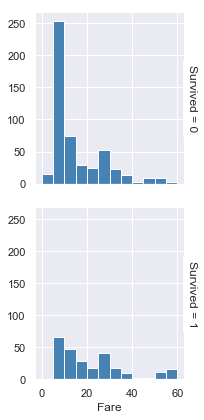

In [6]:
sns.set(style = "darkgrid") #seaborn 그래프 바탕을 그리드 스타일로 설정
g = sns.FacetGrid(train, row = "Survived", margin_titles = True)
# g = sns.FacetGrid(train, row = "Survived", col = "Sex", margin_titles = True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "Fare", color = "steelblue", bins = bins)

C:\Users\byung\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


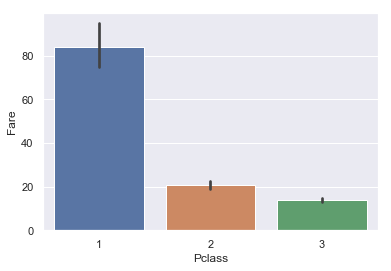

In [7]:
sns.barplot(data = train, x = "Pclass", y = "Fare")

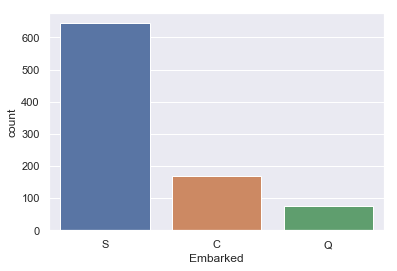

In [8]:
sns.countplot(train["Embarked"])

In [9]:
# Embarked 2개 --> S로
train["Embarked_fill"] = train["Embarked"]
train.loc[train["Embarked"].isnull(), "Embarked_fill"] = "S"
train.loc[train["Embarked_fill"].isnull()]

# Fare NaN 1개 --> Pclass 3이라서, 3의 평균 Fare로 처리
train["Fare_fill"] = train["Fare"]
train.loc[train["Fare"].isnull(), "Fare_fill"] = np.array(train.loc[train["Pclass"] == 3].mean())[1]
train.loc[train["Fare_fill"].isnull()]

train["Familysize"] = train["Parch"] + train["SibSp"]

# train["Name_encode"] = train["Name"]
train.loc[train["Name"].str.contains("Master"), "Name_encode"] = "Master"
train.loc[train["Name"].str.contains("Miss"), "Name_encode"] = "Miss"
train.loc[train["Name"].str.contains("Mr"), "Name_encode"] = "Mr"
train.loc[train["Name"].str.contains("Mrs"), "Name_encode"] = "Mrs"
train.loc[train["Name"].str.contains("Ms"), "Name_encode"] = "Mrs"
train.loc[train["Name_encode"].isnull()].head()

train.loc[((train["Sex"] == "female") & (train["Name_encode"].isnull())), "Name_encode"] = "Miss"
train.loc[((train["Sex"] == "male") & (train["Name_encode"].isnull())), "Name_encode"] = "Mr"

train["Sex_encode"] = train["Sex"] == "male"

#train[["Name", "Name_encode"]].head(20)
train.loc[train["Name_encode"].isnull()]

train["Age_encode"] = train["Age"]
train.loc[train["Age"].isnull(), "Age_encode"] = train["Age"].mean()
train.loc[train["Age_encode"].isnull()]

def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis = 1)
        # concat으로 DF끼리 합치기, axis =1 으로 열끼리 합치기, 기본은 행끼리
        # pd.get_dummies는 원핫인코딩해주는 pandas 함수, 칼럼과 공통어를 지정해주면 됨.
        #data = data.drop(column, axis = 1) #axis = 1이 없으면, 해당 이름의 행을 삭제함
    return data

dummy_columns = ["Sex", "Embarked_fill", "Name_encode", "Pclass"]

train_dummy = dummy_data(train, dummy_columns)

train = train_dummy

print(train.shape)
train.head()

(891, 29)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_fill_C,Embarked_fill_Q,Embarked_fill_S,Name_encode_Master,Name_encode_Miss,Name_encode_Mr,Name_encode_Mrs,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,1,0,0,1,0,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,1,0,0,0,0,0,1,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,1,0,1,0,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0,0,1,0,0,0,1,1,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0,0,1,0,0,1,0,0,0,1


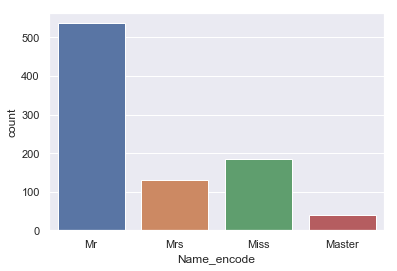

In [10]:
sns.countplot(train["Name_encode"]) #NaN값은 비워두고 안보여줌

In [11]:
# Embarked 2개 --> S로
test["Embarked_fill"] = test["Embarked"]
test.loc[test["Embarked"].isnull(), "Embarked_fill"] = "S"
test.loc[test["Embarked_fill"].isnull()]

# Fare NaN 1개 --> Pclass 3이라서, 3의 평균 Fare로 처리
test["Fare_fill"] = test["Fare"]
test.loc[test["Fare"].isnull(), "Fare_fill"] = np.array(test.loc[test["Pclass"] == 3].mean())[1]
test.loc[test["Fare_fill"].isnull()]

test["Familysize"] = test["Parch"] + test["SibSp"]

# test["Name_encode"] = test["Name"]
test.loc[test["Name"].str.contains("Master"), "Name_encode"] = "Master"
test.loc[test["Name"].str.contains("Miss"), "Name_encode"] = "Miss"
test.loc[test["Name"].str.contains("Mr"), "Name_encode"] = "Mr"
test.loc[test["Name"].str.contains("Mrs"), "Name_encode"] = "Mrs"
test.loc[test["Name"].str.contains("Ms"), "Name_encode"] = "Mrs"
test.loc[test["Name_encode"].isnull()].head()

test.loc[((test["Sex"] == "female") & (test["Name_encode"].isnull())), "Name_encode"] = "Miss"
test.loc[((test["Sex"] == "male") & (test["Name_encode"].isnull())), "Name_encode"] = "Mr"

test["Sex_encode"] = test["Sex"] == "male"

#test[["Name", "Name_encode"]].head(20)
test.loc[test["Name_encode"].isnull()]

test["Age_encode"] = test["Age"]
test.loc[test["Age"].isnull(), "Age_encode"] = test["Age"].mean()
test.loc[test["Age_encode"].isnull()]

def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis = 1)
        # concat으로 DF끼리 합치기, axis =1 으로 열끼리 합치기, 기본은 행끼리
        # pd.get_dummies는 원핫인코딩해주는 pandas 함수, 칼럼과 공통어를 지정해주면 됨.
        #data = data.drop(column, axis = 1) #axis = 1이 없으면, 해당 이름의 행을 삭제함
    return data

dummy_columns = ["Sex", "Embarked_fill", "Name_encode", "Pclass"]

test_dummy = dummy_data(test, dummy_columns)

test = test_dummy

print(test.shape)
test.head()

(418, 28)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Embarked_fill_C,Embarked_fill_Q,Embarked_fill_S,Name_encode_Master,Name_encode_Miss,Name_encode_Mr,Name_encode_Mrs,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,...,0,1,0,0,0,1,0,0,0,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,...,0,0,1,0,0,0,1,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,...,0,1,0,0,0,1,0,0,1,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,...,0,0,1,0,0,1,0,0,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,...,0,0,1,0,0,0,1,0,0,1


C:\Users\byung\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


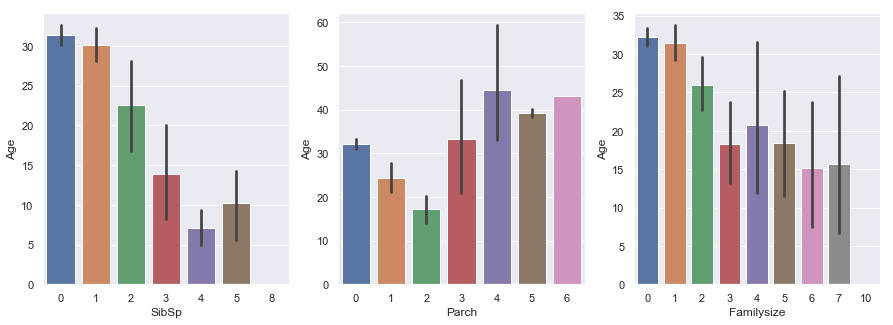

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3) 
#fig 또는 figure라고 해도 됨. plt.subplot. cols가 아니라 ncols
fig.set_size_inches(15, 5)

sns.barplot(data = train, x = "SibSp", y = "Age", ax = ax1)
sns.barplot(data = train, x = "Parch", y = "Age", ax = ax2)
sns.barplot(data = train, x = "Familysize", y = "Age", ax = ax3)

# DS Schoool Feature 반영

In [13]:
#DSSchool 버전 추가
train["Child"] = train["Age_encode"] < 15
test["Child"] = test["Age_encode"] < 15

train["Alone"] = train["Familysize"] == 0
train["Small"] = (train["Familysize"] > 0) & (train["Familysize"] < 4)
train["Big"] = train["Familysize"] >= 4

test["Alone"] = test["Familysize"] == 0
test["Small"] = (test["Familysize"] > 0) & (test["Familysize"] < 4)
test["Big"] = test["Familysize"] >= 4

train[["Child", "Age_encode", "Alone", "Small", "Big", "Familysize"]].head(20)

,Child,Age_encode,Alone,Small,Big,Familysize
PassengerId,,,,,,
1,False,22.000000,False,True,False,1
2,False,38.000000,False,True,False,1
3,False,26.000000,True,False,False,0
4,False,35.000000,False,True,False,1
5,False,35.000000,True,False,False,0
6,False,29.699118,True,False,False,0
7,False,54.000000,True,False,False,0
8,True,2.000000,False,False,True,4
9,False,27.000000,False,True,False,2


# 10/02 - 티켓 문자 여부

In [14]:
def is_float(val):
        try:
            float(val)
        except ValueError:
            return False
        else:
            return True

a = np.array(['1.2', '2.3', '1.2.3'])

is_numeric_1 = lambda x: map(is_float, x)              # return python list
is_numeric_2 = lambda x: np.array(map(is_float, x))    # return numpy array
is_numeric_3 = np.vectorize(is_float, otypes = [bool]) # return numpy array

In [15]:
b = is_numeric_3(a)
print(b)

[ True  True False]


In [16]:
train["Ticket_type"] = is_numeric_3(train["Ticket"])
test["Ticket_type"] = is_numeric_3(test["Ticket"])

In [17]:
train[["Ticket", "Ticket_type"]].head()

,Ticket,Ticket_type
PassengerId,,
1,A/5 21171,False
2,PC 17599,False
3,STON/O2. 3101282,False
4,113803,True
5,373450,True


# 10/02 - Fare 극단값 정리 & 구간화

In [33]:
train_fare = train.loc[train["Fare"] < 100]

C:\Users\byung\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


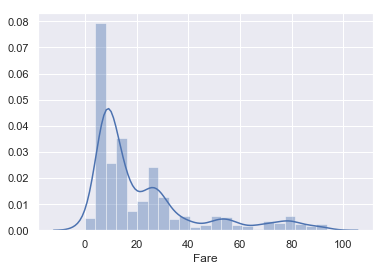

In [34]:
sns.distplot(train_fare["Fare"])

In [35]:
train["Fare_fill_encode"] = train["Fare_fill"]
train.loc[train["Fare_fill"] < 20, "Fare_fill_encode"] = 0
train.loc[(train["Fare_fill"] >= 20) & (train["Fare_fill"] < 40), "Fare_fill_encode"] = 1
train.loc[(train["Fare_fill"] >= 40) & (train["Fare_fill"] < 60), "Fare_fill_encode"] = 2
train.loc[(train["Fare_fill"] >= 60) & (train["Fare_fill"] < 80), "Fare_fill_encode"] = 3
train.loc[(train["Fare_fill"] >= 80) & (train["Fare_fill"] < 100), "Fare_fill_encode"] = 3
train.loc[train["Fare_fill"] > 100, "Fare_fill_encode"] = 4

test["Fare_fill_encode"] = test["Fare_fill"]
test.loc[test["Fare_fill"] < 20, "Fare_fill_encode"] = 0
test.loc[(test["Fare_fill"] >= 20) & (test["Fare_fill"] < 40), "Fare_fill_encode"] = 1
test.loc[(test["Fare_fill"] >= 40) & (test["Fare_fill"] < 60), "Fare_fill_encode"] = 2
test.loc[(test["Fare_fill"] >= 60) & (test["Fare_fill"] < 80), "Fare_fill_encode"] = 3
test.loc[(test["Fare_fill"] >= 80) & (test["Fare_fill"] < 100), "Fare_fill_encode"] = 3
test.loc[test["Fare_fill"] > 100, "Fare_fill_encode"] = 4

In [36]:
train[["Fare_fill_encode", "Fare_fill"]].head()

,Fare_fill_encode,Fare_fill
PassengerId,,
1,0.0,7.2500
2,3.0,71.2833
3,0.0,7.9250
4,2.0,53.1000
5,0.0,8.0500


In [37]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Embarked_fill', 'Fare_fill', 'Familysize',
       'Name_encode', 'Sex_encode', 'Age_encode', 'Sex_female', 'Sex_male',
       'Embarked_fill_C', 'Embarked_fill_Q', 'Embarked_fill_S',
       'Name_encode_Master', 'Name_encode_Miss', 'Name_encode_Mr',
       'Name_encode_Mrs', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Child', 'Alone',
       'Small', 'Big', 'Ticket_type', 'Fare_fill_encode'],
      dtype='object')

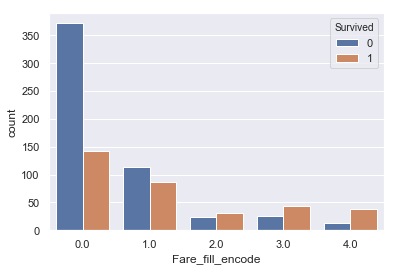

In [38]:
sns.countplot(data = train, x = "Fare_fill_encode", hue = "Survived")

# Feature_Selection

In [39]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Embarked_fill', 'Fare_fill', 'Familysize',
       'Name_encode', 'Sex_encode', 'Age_encode', 'Sex_female', 'Sex_male',
       'Embarked_fill_C', 'Embarked_fill_Q', 'Embarked_fill_S',
       'Name_encode_Master', 'Name_encode_Miss', 'Name_encode_Mr',
       'Name_encode_Mrs', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Child', 'Alone',
       'Small', 'Big', 'Ticket_type', 'Fare_fill_encode'],
      dtype='object')

# submission_titanic_Tree_0.8384_180921_randomstate 0으로 한 거임.. 다시제출해보도록

# gridSearch 다시 해보도록

# Sex를 원핫인코딩한 것과, 1개 열로 처리하는 것의 차이가 있다. (1개 열로 처리하는게 정확)

In [40]:
feature_names = ['Fare_fill', 'Sex_encode', 'Pclass', 'Ticket_type',
                 'Embarked_fill_C', 'Embarked_fill_S', 'Embarked_fill_Q', 
                 'Name_encode_Master', 'Child', 'Alone', 'Small', 'Big']

# DSSchool버전 + Ticket_타입
# Tree 0.8317 Kaggle 0.81339
# XGB 0.8272 kaggle 0.80382 

feature_names5 = ['Fare_fill_encode', 'Sex_encode', 'Pclass', 
                 'Embarked_fill_C', 'Embarked_fill_S', 'Embarked_fill_Q', 
                 'Name_encode_Master', 'Child', 'Alone', 'Small', 'Big']

# DSSchool버전 + Fare 구간화
# Tree 0.8182 Kaggle 0.78947
# XGB 0.8283 kaggle  0.79425


feature_names4 = ['Fare_fill', 'Sex_encode', 'Pclass', 
                 'Embarked_fill_C', 'Embarked_fill_S', 'Embarked_fill_Q', 
                 'Name_encode_Master', 'Child', 'Alone', 'Small', 'Big']

# DSSchool버전
# Tree 0.8418 Kaggle 0.81339
# XGB 0.8272 kaggle 0.80382 

feature_names3 = ['Parch', 'SibSp', 'Fare_fill',
       'Familysize', 'Sex_female', 'Sex_encode',
       'Embarked_fill_C', 'Embarked_fill_S',
       'Name_encode_Master', 'Name_encode_Miss', 'Name_encode_Mr',
       'Name_encode_Mrs', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age_encode',
       'Child', 'Alone', 'Small', 'Big']

# Tree 0.8171 Kaggle 0.75598
# XGB 0.8328 kaggle 0.79904 (1587위)

feature_names2 = ['Parch', 'SibSp', 'Fare_fill',
       'Familysize', 'Sex_female',
       'Embarked_fill_C', 'Embarked_fill_S',
       'Name_encode_Master', 'Name_encode_Miss', 'Name_encode_Mr',
       'Name_encode_Mrs', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age_encode']

# RF 0.8094 Kaggle 0.75598
# XGB 0.8328 kaggle 0.79904 (1587위)

# feature importance가 0인 변수 제외해도 Score는 동일함 (Kaggle은 업로드X)
# (Name_encode_Master,Name_encode_Miss, Name_encode_Mrs, Sex_female, SibSp)

feature_names1 = ['Parch', 'SibSp', 'Fare_fill',
       'Familysize', 'Sex_female', 'Sex_male',
       'Embarked_fill_C', 'Embarked_fill_Q', 'Embarked_fill_S',
       'Name_encode_Master', 'Name_encode_Miss', 'Name_encode_Mr',
       'Name_encode_Mrs', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age_encode']

label_name = 'Survived'

X_train = train[feature_names]
X_test = test[feature_names]
y_train = train[label_name]

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Fare_fill             891 non-null float64
Sex_encode            891 non-null bool
Pclass                891 non-null int64
Ticket_type           891 non-null bool
Embarked_fill_C       891 non-null uint8
Embarked_fill_S       891 non-null uint8
Embarked_fill_Q       891 non-null uint8
Name_encode_Master    891 non-null uint8
Child                 891 non-null bool
Alone                 891 non-null bool
Small                 891 non-null bool
Big                   891 non-null bool
dtypes: bool(6), float64(1), int64(1), uint8(4)
memory usage: 69.6 KB


In [42]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 12 columns):
Fare_fill             418 non-null float64
Sex_encode            418 non-null bool
Pclass                418 non-null int64
Ticket_type           418 non-null bool
Embarked_fill_C       418 non-null uint8
Embarked_fill_S       418 non-null uint8
Embarked_fill_Q       418 non-null uint8
Name_encode_Master    418 non-null uint8
Child                 418 non-null bool
Alone                 418 non-null bool
Small                 418 non-null bool
Big                   418 non-null bool
dtypes: bool(6), float64(1), int64(1), uint8(4)
memory usage: 13.9 KB


# Model Load

In [43]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
model_rf = RandomForestClassifier(random_state = 79, n_jobs = -1)
model_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=79, verbose=0, warm_start=False)

In [45]:
model_xgb = XGBClassifier(random_state = 79, n_jobs = -1)
model_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=79, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [46]:
model_tree = DecisionTreeClassifier(max_depth = 8, random_state = 0)
model_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# GridSearch & RandomizedSearch

In [47]:
# GridSearch 

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {'n_estimators' : [500, 700, 900], # 700이상은 0.84로 동일
             'learning_rate' : [0.001, 0.05, 0.01, 0.1], # 0.001이 0.84로 가장 높았음
             'random_state' : [79],
             'n_jobs' : [-1]}

grid = GridSearchCV(model_xgb, param_grid = param_grid, cv = 5)
%time grid.fit(X_train, y_train)

Wall time: 21.9 s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=79, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [500, 700, 900], 'learning_rate': [0.001, 0.05, 0.01, 0.1], 'random_state': [79], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
grid_df = pd.DataFrame(grid.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_n_jobs,param_random_state,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.249844,0.027818,0.003125,0.006250,0.001,500,-1,79,"{'learning_rate': 0.001, 'n_estimators': 500, ...",0.843575,...,0.820426,0.017360,7,0.832865,0.839888,0.838710,0.847125,0.809524,0.833622,0.012875
1,0.314246,0.004614,0.006250,0.007655,0.001,700,-1,79,"{'learning_rate': 0.001, 'n_estimators': 700, ...",0.843575,...,0.819304,0.017941,9,0.832865,0.839888,0.838710,0.847125,0.815126,0.834743,0.010806
2,0.406220,0.013974,0.009375,0.007654,0.001,900,-1,79,"{'learning_rate': 0.001, 'n_estimators': 900, ...",0.826816,...,0.815937,0.014266,12,0.838483,0.839888,0.838710,0.847125,0.815126,0.835866,0.010845
3,0.270896,0.044803,0.008642,0.006234,0.05,500,-1,79,"{'learning_rate': 0.05, 'n_estimators': 500, '...",0.815642,...,0.829405,0.027204,6,0.890449,0.904494,0.890603,0.886396,0.897759,0.893940,0.006422
4,0.320411,0.015156,0.001600,0.003199,0.05,700,-1,79,"{'learning_rate': 0.05, 'n_estimators': 700, '...",0.821229,...,0.831650,0.024263,3,0.893258,0.905899,0.894811,0.899018,0.900560,0.898709,0.004475


In [49]:
scores = np.array(grid_df.mean_test_score).reshape(4, 3)

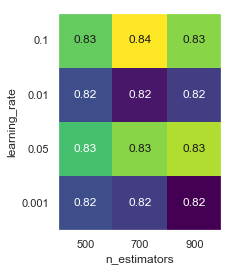

In [50]:
import mglearn

mglearn.tools.heatmap(scores, xlabel = 'n_estimators', xticklabels = param_grid['n_estimators'],
                     ylabel = 'learning_rate', yticklabels = param_grid['learning_rate'], cmap = 'viridis')

In [51]:
# print(grid.cv_results_)
print(f"best score: {grid.best_score_ : .4f}")
print(f"best param: {grid.best_params_}")

best score:  0.8350
best param: {'learning_rate': 0.1, 'n_estimators': 700, 'n_jobs': -1, 'random_state': 79}


In [52]:
# RandomizedSearch

import scipy.stats as st

params = {'n_estimators' : st.randint(700, 750),
          'learning_rate' : st.uniform(0.003, 0.002),
             'random_state' : [79],
             'n_jobs' : [-1]
}

gs = RandomizedSearchCV(model_xgb, params, cv = 5, n_iter=10) 
# 기본값 cv없음, n_iter = 10
%time gs.fit(X_train, y_train)

#print(gs.cv_results_)
print(f"best score: {gs.best_score_ : .4f}")
print(f"best param: {gs.best_params_}")

Wall time: 20.9 s
best score:  0.8249
best param: {'learning_rate': 0.0030516406289038973, 'n_estimators': 746, 'n_jobs': -1, 'random_state': 79}


In [53]:
grid_df = pd.DataFrame(gs.cv_results_)
grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_n_jobs,param_random_state,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.421222,0.035315,0.007124,0.005183,0.00332321,723,-1,79,"{'learning_rate': 0.003323208504965938, 'n_est...",0.821229,...,0.822671,0.018017,4,0.849719,0.839888,0.838710,0.851332,0.838936,0.843717,0.005597
1,0.377032,0.059726,0.002400,0.003200,0.0046846,702,-1,79,"{'learning_rate': 0.004684596082346761, 'n_est...",0.810056,...,0.820426,0.019664,7,0.853933,0.848315,0.841515,0.866760,0.850140,0.852132,0.008349
2,0.418949,0.013363,0.006401,0.003201,0.00423075,735,-1,79,"{'learning_rate': 0.0042307480982745, 'n_estim...",0.810056,...,0.820426,0.019664,7,0.852528,0.848315,0.840112,0.866760,0.850140,0.851571,0.008667
3,0.376898,0.030091,0.007123,0.006297,0.00406724,728,-1,79,"{'learning_rate': 0.004067244745122329, 'n_est...",0.815642,...,0.821549,0.019193,6,0.851124,0.848315,0.840112,0.866760,0.850140,0.851290,0.008654
4,0.440885,0.062872,0.004799,0.004664,0.00474154,718,-1,79,"{'learning_rate': 0.004741539571591141, 'n_est...",0.810056,...,0.819304,0.018195,9,0.859551,0.848315,0.841515,0.866760,0.850140,0.853256,0.008877
5,0.410519,0.065196,0.005525,0.005857,0.00335042,707,-1,79,"{'learning_rate': 0.003350422511609057, 'n_est...",0.821229,...,0.822671,0.018017,4,0.849719,0.839888,0.838710,0.851332,0.838936,0.843717,0.005597
6,0.343724,0.009881,0.003125,0.006250,0.00305164,746,-1,79,"{'learning_rate': 0.0030516406289038973, 'n_es...",0.821229,...,0.824916,0.021359,1,0.849719,0.839888,0.838710,0.849930,0.833333,0.842316,0.006517
7,0.328833,0.009989,0.009375,0.007655,0.00352417,732,-1,79,"{'learning_rate': 0.0035241730365691407, 'n_es...",0.815642,...,0.819304,0.016822,9,0.849719,0.848315,0.838710,0.858345,0.848739,0.848766,0.006229
8,0.401387,0.033359,0.005600,0.003200,0.00305727,704,-1,79,"{'learning_rate': 0.0030572749936759497, 'n_es...",0.821229,...,0.824916,0.021359,1,0.848315,0.839888,0.838710,0.849930,0.833333,0.842035,0.006215
9,0.333577,0.017930,0.006324,0.005294,0.0032549,706,-1,79,"{'learning_rate': 0.003254897455027803, 'n_est...",0.821229,...,0.824916,0.021359,1,0.849719,0.839888,0.838710,0.849930,0.833333,0.842316,0.006517


In [54]:
scores = np.array(grid_df.mean_test_score).reshape(10, 1)

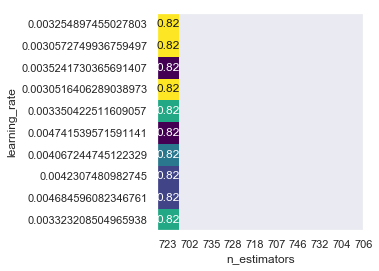

In [55]:
mglearn.tools.heatmap(scores, xlabel = 'n_estimators', xticklabels = grid_df['param_n_estimators'],
                     ylabel = 'learning_rate', yticklabels = grid_df['param_learning_rate'], cmap = 'viridis')

# Model Fit

In [52]:
from sklearn.model_selection import cross_val_score

model_rf = RandomForestClassifier(n_estimators = 100, random_state = 79, n_jobs = -1)
model_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=79, verbose=0, warm_start=False)

model_rf.fit(X_train, y_train)
%time score_rf = cross_val_score(model_rf, X_train, y_train, cv = 10)

#print(f"{np.round(scores_age, 2)} \n {scores_age.mean(): .2f}")
print(f"RF점수: {np.round(score_rf, 2)} \nRF평균: {score_rf.mean(): .4f}")

score_rf = score_rf.mean()

# Model Selection - XGB

In [172]:
model_xgb = XGBClassifier(learning_rate=0.002025398988117261, n_estimators=715, 
                          random_state = 79, n_jobs = -1)
model_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.002025398988117261,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=715, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=79, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [152]:
import warnings
warnings.filterwarnings('ignore')

model_xgb.fit(X_train, y_train)
%time score_xgb = cross_val_score(model_xgb, X_train, y_train, cv = 10)

#print(f"{np.round(scores_age, 2)} \n {scores_age.mean(): .2f}")
print(f"점수: {np.round(score_xgb, 2)} \n평균: {score_xgb.mean(): .4f}")

Wall time: 3.55 s
점수: [0.83 0.82 0.79 0.88 0.84 0.81 0.82 0.76 0.88 0.85] 
평균:  0.8283


In [153]:
score_xgb = score_xgb.mean()

# Model Selection - Tree

In [173]:
model_tree.fit(X_train, y_train)
%time score_tree = cross_val_score(model_tree, X_train, y_train, cv = 10)
print(f"점수: {np.round(score_tree, 2)} \n평균: {score_tree.mean(): .4f}")
score_tree = score_tree.mean()

Wall time: 105 ms
점수: [0.78 0.86 0.75 0.9  0.88 0.85 0.83 0.75 0.87 0.85] 
평균:  0.8317


In [174]:
print("Train Set accuracy = ", model_tree.score(X_train, y_train))
# DS스쿨은 Train Set accuracy =  0.8877665544332211

Train Set accuracy =  0.8877665544332211


# Visualize

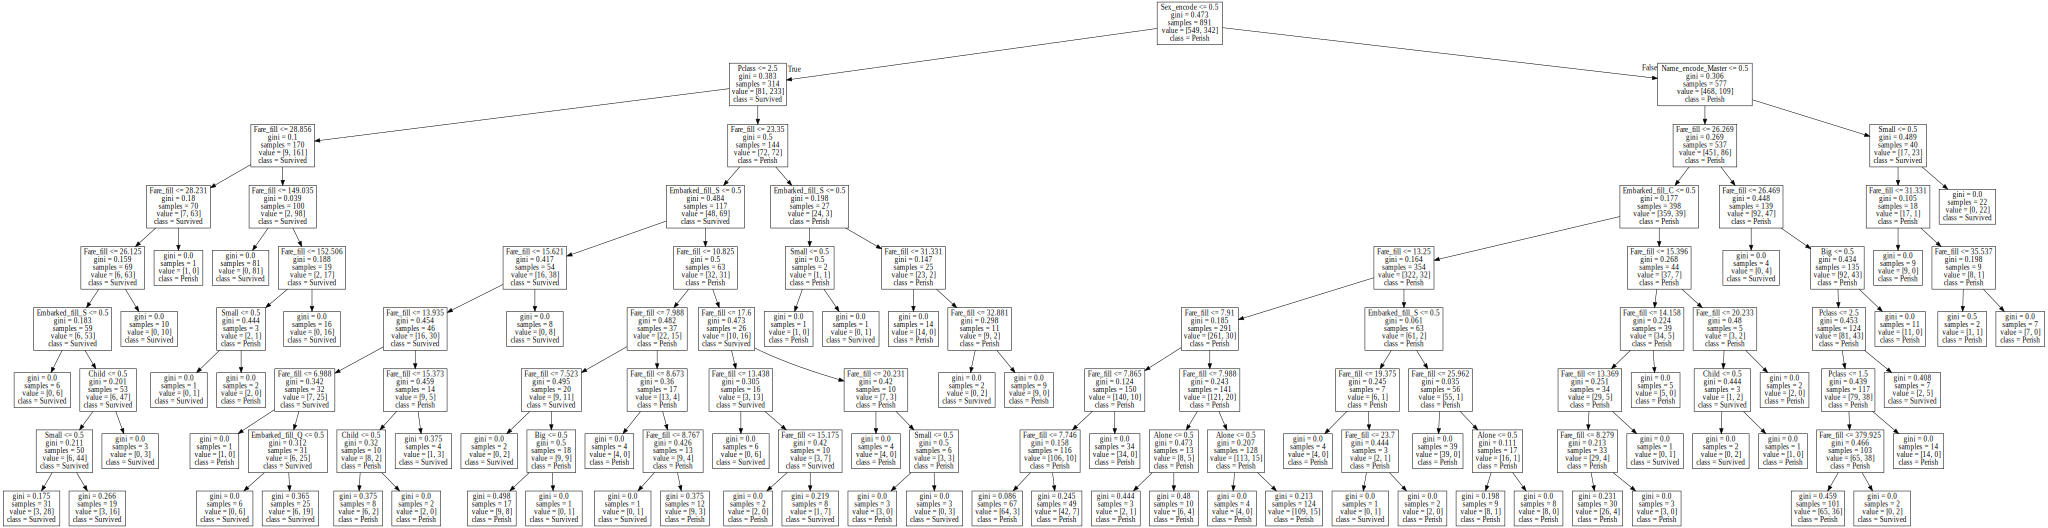

In [136]:
import graphviz
from sklearn.tree import export_graphviz
dot_tree = export_graphviz(model_tree,
                           feature_names=feature_names,
                           class_names=["Perish", "Survived"],
                           out_file=None)
graphviz.Source(dot_tree)

# Feature Importance - RF

In [100]:
print(list(zip(feature_names, model_rf.feature_importances_)))
feature_df = list(zip(feature_names, model_rf.feature_importances_))
feature_df = pd.DataFrame(feature_df)
feature_df.columns = feature_df.columns.astype(str)
feature_df.columns = ["feature", "importance"]
feature_df.sort_values(by=['importance', 'feature'], ascending=[False, True], inplace=True)
feature_df

[('Parch', 0.01658872596216546), ('SibSp', 0.022572186111901923), ('Fare_fill', 0.224845936281715), ('Familysize', 0.03477479753077706), ('Sex_female', 0.07940328753872507), ('Sex_encode', 0.07241339594850231), ('Embarked_fill_C', 0.01175689978712604), ('Embarked_fill_S', 0.015986622677411536), ('Name_encode_Master', 0.007927061919381171), ('Name_encode_Miss', 0.023988541615800323), ('Name_encode_Mr', 0.1150697100528175), ('Name_encode_Mrs', 0.02472979919189025), ('Pclass_1', 0.025268129206519673), ('Pclass_2', 0.012770736005163695), ('Pclass_3', 0.04719238840904955), ('Age_encode', 0.21555562695436273), ('Child', 0.00954721622947348), ('Alone', 0.006708888875661089), ('Small', 0.015136716930108008), ('Big', 0.017763332771448172)]


,feature,importance
2,Fare_fill,0.224846
15,Age_encode,0.215556
10,Name_encode_Mr,0.115070
4,Sex_female,0.079403
5,Sex_encode,0.072413
14,Pclass_3,0.047192
3,Familysize,0.034775
12,Pclass_1,0.025268
11,Name_encode_Mrs,0.024730
9,Name_encode_Miss,0.023989


# Feature Importance - XGB

In [119]:
print(list(zip(feature_names, model_xgb.feature_importances_)))
feature_df = list(zip(feature_names, model_xgb.feature_importances_))
feature_df = pd.DataFrame(feature_df)
feature_df.columns = feature_df.columns.astype(str)
feature_df.columns = ["feature", "importance"]
feature_df.sort_values(by=['importance', 'feature'], ascending=[False, True], inplace=True)
feature_df

[('Fare_fill_encode', 0.13128862), ('Sex_encode', 0.15776698), ('Pclass', 0.31509268), ('Embarked_fill_C', 0.0), ('Embarked_fill_S', 0.054721978), ('Embarked_fill_Q', 0.0), ('Name_encode_Master', 0.15776698), ('Child', 0.0), ('Alone', 0.0), ('Small', 0.07987644), ('Big', 0.10348632)]


,feature,importance
2,Pclass,0.315093
6,Name_encode_Master,0.157767
1,Sex_encode,0.157767
0,Fare_fill_encode,0.131289
10,Big,0.103486
9,Small,0.079876
4,Embarked_fill_S,0.054722
8,Alone,0.000000
7,Child,0.000000
3,Embarked_fill_C,0.000000


# Feature Importance - Tree

In [175]:
print(list(zip(feature_names, model_tree.feature_importances_)))
feature_df = list(zip(feature_names, model_tree.feature_importances_))
feature_df = pd.DataFrame(feature_df)
feature_df.columns = feature_df.columns.astype(str)
feature_df.columns = ["feature", "importance"]
feature_df.sort_values(by=['importance', 'feature'], ascending=[False, True], inplace=True)
feature_df

[('Fare_fill', 0.22934967194217495), ('Sex_encode', 0.45007348783779233), ('Pclass', 0.12220615113837166), ('Ticket_type', 0.014860545605591361), ('Embarked_fill_C', 0.007865005314255992), ('Embarked_fill_S', 0.011194782990041764), ('Embarked_fill_Q', 0.0020162908686783792), ('Name_encode_Master', 0.046349380288513736), ('Child', 0.003429731667911618), ('Alone', 0.0), ('Small', 0.005141279689026086), ('Big', 0.10751367265764211)]


,feature,importance
1,Sex_encode,0.450073
0,Fare_fill,0.229350
2,Pclass,0.122206
11,Big,0.107514
7,Name_encode_Master,0.046349
3,Ticket_type,0.014861
5,Embarked_fill_S,0.011195
4,Embarked_fill_C,0.007865
10,Small,0.005141
8,Child,0.003430


# Predict & Submit

In [176]:
import datetime
today_titanic = datetime.datetime.today().strftime("%y%m%d")

In [104]:
predictions_rf = model_rf.predict(X_test)
submission_rf = pd.read_csv("d:/Python/data/titanic/gender_submission.csv")

submission_rf["Survived"] = predictions_rf

print(submission_rf.shape)
submission_rf.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [34]:
submission_rf.to_csv(f"d:/Python/data/titanic/submission_titanic_RF_{score_rf:.4f}_{today_titanic}.csv", index=False)

In [121]:
predictions_xgb = model_xgb.predict(X_test)
submission_xgb = pd.read_csv("data/titanic/gender_submission.csv")

submission_xgb["Survived"] = predictions_xgb

print(submission_xgb.shape)
submission_xgb.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [122]:
submission_xgb.to_csv(f"data/titanic/submission_titanic_XGB_{score_xgb:.4f}_{today_titanic}.csv", index=False)

In [177]:
predictions_tree = model_tree.predict(X_test)
submission_tree = pd.read_csv("data/titanic/gender_submission.csv")

submission_tree["Survived"] = predictions_tree

print(submission_tree.shape)
submission_tree.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [178]:
submission_tree.to_csv(f"data/titanic/submission_titanic_Tree_{score_tree:.4f}_{today_titanic}.csv", index=False)